<a href="https://colab.research.google.com/github/lua1235/TornML/blob/main/Testbed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Get Dataset From Google Sheets


In [6]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('Torn ML DataSet').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get('J2:CX')
rows[1:] = [[np.float64(i) for i in r] for r in rows[1:]]

view = pd.DataFrame(rows[1:], columns=rows[0])

# normalize
lMean = view['Stat Totals'].mean()
lStd = view['Stat Totals'].std()

fMean = view[view.columns[1:]].mean()
fMean = view[view.columns[1:]].std()

view = (view - view.mean())/view.std()
labels = view['Stat Totals'].to_numpy()
features = view[view.columns[1:]].to_numpy()
print(view.shape)
print(labels.shape)
print(features.shape)

features = np.append(np.ones((len(features), 1)), features, 1) # append a column of 1s for bias term



(178, 93)
(178,)
(178, 92)


# Batch GD Regression Learner
Using squared loss

In [43]:
# X - (n, d+1) matrix of features
# Y - (n, 1) vector of labels

def batch_erm_learner(X, y, step_function, random_seed = 1, epochs = 10) :
  n, d = np.shape(X)
  w = np.random.default_rng(random_seed).random(d) # random weight initialization

  for i in range(epochs) :
    gradient = (2/n) * (X.T @ (X @ w - y))
    w = w - step_function(i) * gradient

  # x - (d, 1) vector of features
  def predictor(x) :
    return x @ w

  return predictor, w

#Training and Testing

    epochs  training error  testing error
0        0      469.927980    1046.517225
1        1      146.208390     381.995144
2        2       49.224918     158.958477
3        3       19.784302      78.778273
4        4       10.515536      47.272440
..     ...             ...            ...
95      95        0.387629       6.968261
96      96        0.382891       6.927033
97      97        0.378256       6.886402
98      98        0.373721       6.846355
99      99        0.369284       6.806878

[100 rows x 3 columns]


<Axes: xlabel='epochs'>

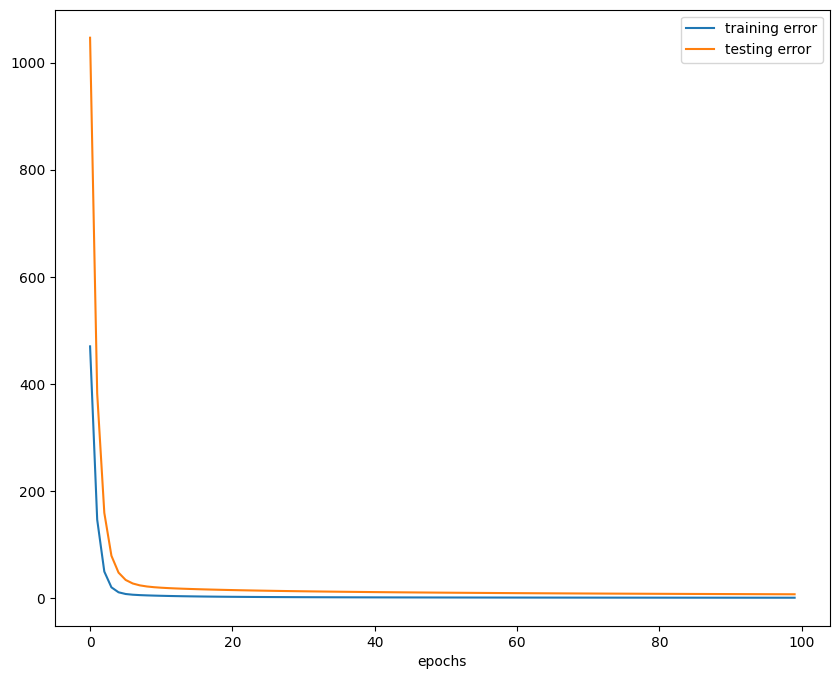

In [64]:
# split the dataset into training and testing set
n = len(features)
train_features = features[:(n + 1) // 2]
train_labels = labels[:(n + 1) // 2]
train_n = len(train_features)

test_features = features[(n + 1) // 2:]
test_labels = labels[(n + 1) // 2:]
test_n = len(train_features)

errors = {'epochs' : [], 'training error' : [], 'testing error' : []}

def loss(a) :
    return 0.01

for i in range(100) :
  batch_erm_f, batch_erm_w = batch_erm_learner(train_features, train_labels, loss, epochs = i)
  #print(batch_erm_w)
  #print(batch_erm_f(train_features[0]))
  train_error = (1/train_n) * sum([(batch_erm_f(x) - y) ** 2 for x, y in zip(train_features, train_labels)])
  test_error = (1/test_n) * sum([(batch_erm_f(x) - y) ** 2 for x, y in zip(test_features, test_labels)])
  errors['epochs'].append(i)
  errors['training error'].append(train_error)
  errors['testing error'].append(test_error)

errors = pd.DataFrame(errors)
print(errors)
errors.plot(figsize=(10, 8), x='epochs', y=['training error', 'testing error'])




In [ ]:
batch_erm_f, batch_erm_w = batch_erm_learner(train_features, train_labels, loss, epochs = 10000)


